In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
california=fetch_california_housing()

In [3]:
X=pd.DataFrame(california.data,columns=california.feature_names)
y=pd.Series(california.target,name="Price")

In [4]:
print("Dataset Description:")
print(california.DESCR)
print("\nFeature Summary:")
print(X.describe())

Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census,

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [7]:
print("\nCoefficients:")
for name,coef in zip(X.columns,model.coef_):
    print(f"{name}:{coef:.4f}")
print(f"Intercept:{model.intercept_:.4f}")


Coefficients:
MedInc:0.4487
HouseAge:0.0097
AveRooms:-0.1233
AveBedrms:0.7831
Population:-0.0000
AveOccup:-0.0035
Latitude:-0.4198
Longitude:-0.4337
Intercept:-37.0233


In [8]:
y_pred=model.predict(X_test)

In [9]:
print("\nSample Predictions:")
results=pd.DataFrame({
    "Actual Price" : y_test.values[:10],
    "Predicted Price" : y_pred[:10]
})
print(results)


Sample Predictions:
   Actual Price  Predicted Price
0       0.47700         0.719123
1       0.45800         1.764017
2       5.00001         2.709659
3       2.18600         2.838926
4       2.78000         2.604657
5       1.58700         2.011754
6       1.98200         2.645500
7       1.57500         2.168755
8       3.40000         2.740746
9       4.46600         3.915615


In [10]:
import matplotlib.pyplot as plt
import os

if not os.path.exists('images'):
    os.makedirs('images')

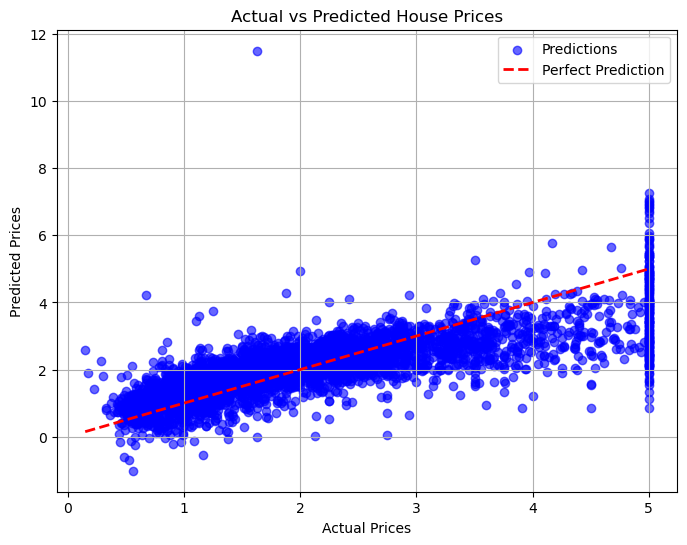

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.savefig('images/actual_vs_predicted.png')
plt.show()

In [12]:
mse=mean_squared_error(y_test,y_pred)
print(f"\nMean Squared Error : {mse:.4f}")


Mean Squared Error : 0.5559
